<a href="https://colab.research.google.com/github/Oumayma-Lahmer/DAR-tp4_1/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Dataset into a pandas DataFrame




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/sample_data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

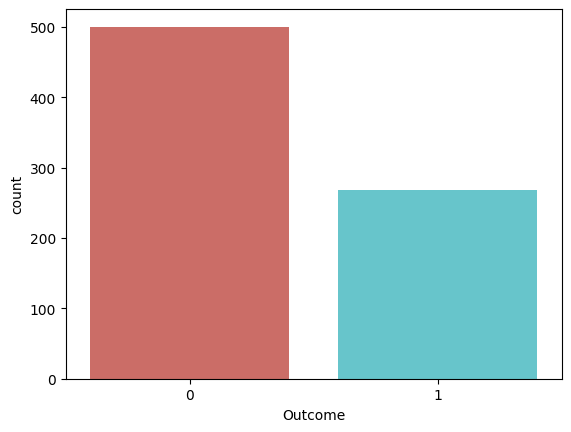

In [ ]:
import seaborn as sns
sns.countplot(x="Outcome", data=df,palette="hls")

### Check out value distribution of individual feature

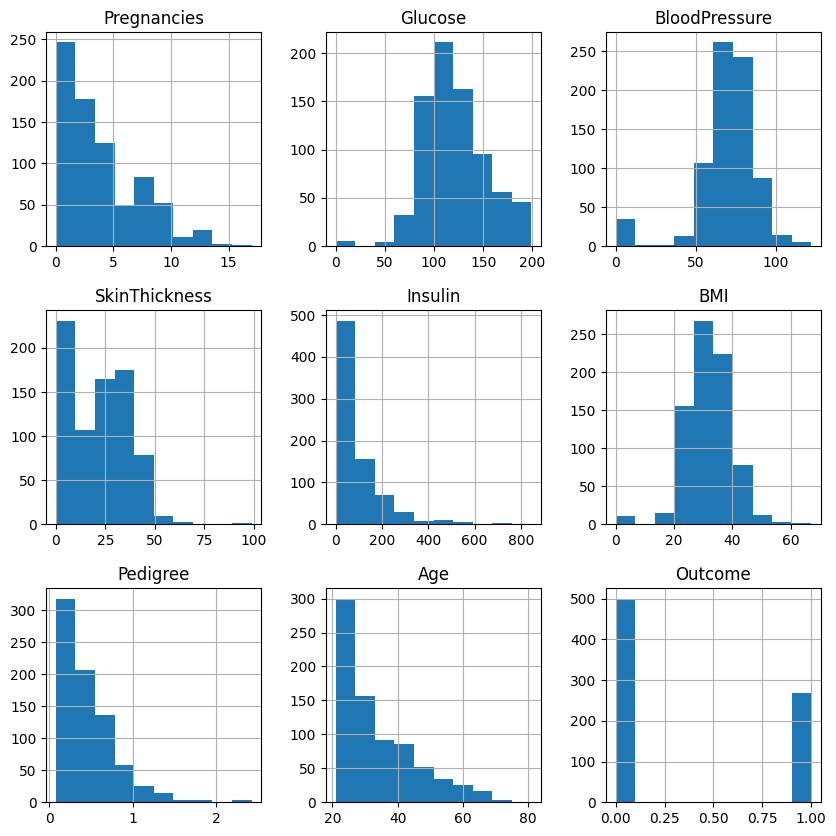

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize = (10,10))
plt.show()

### Get dominating value range and idea about outliers for each feature
Comments on 0 value columns identified previously
1. Pregnancies: 250 (1/3 candidates) have this value. But 0 value is possible, considering that 0 pregnancies is not really unheard of if age is between 20 - 80

2. Glucose : Not too many samples at 0

3. Blood Pressure : Not too many samples at 0

4. SkinThickness : more than 200 samples have 0. So 0 seems more like filler rather than possible real 0 value

5. Insulin: more than half samples have 0. So 0 seems more like filler rather than possible real 0 value, while Type 1 diabetes results from the absence of insulin in the body, often diagnosed before the age of 40, typically during adolescence or early adulthood. It accounts for approximately 10% of all diabetes cases, requiring a lifelong administration of insulin, regular blood tests, and a specific diet to maintain proper blood sugar levels.


6. BMI: Not too many samples at 0

#Detect Missing values and outliers
on utilise boxPlot
ref: https://chartio.com/learn/charts/box-plot-complete-guide/


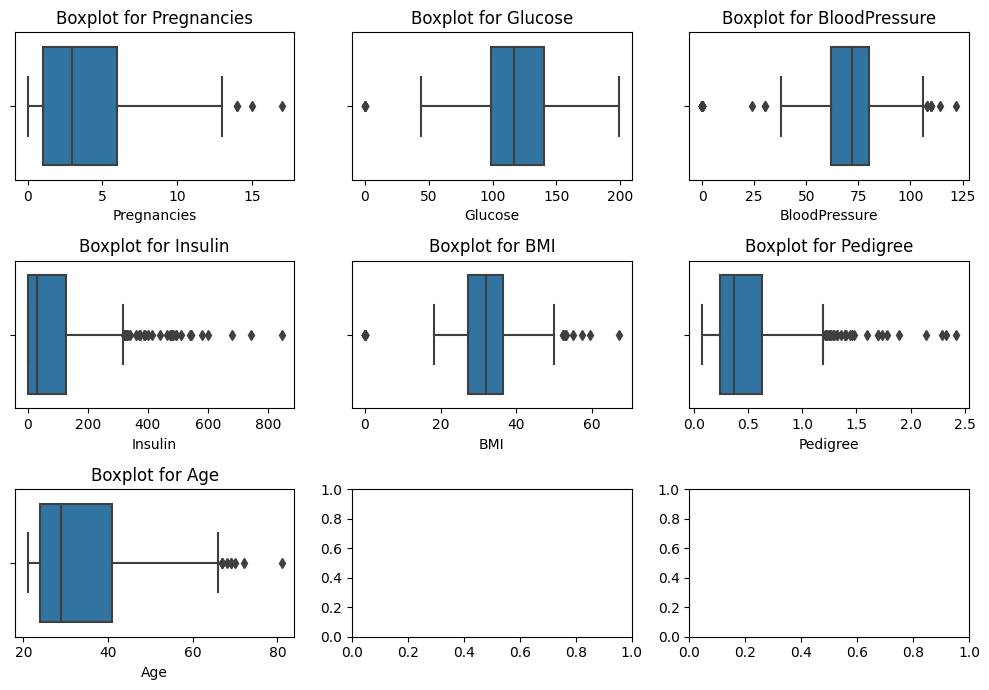

In [ ]:
n_rows, n_columns = 3, 3

fig, axes = plt.subplots(n_rows, n_columns, figsize=(10, 7))
axes = axes.flatten()
'''
La méthode flatten() est utilisée pour aplatir un tableau multidimensionnel
(comme une grille d'axes) en un tableau unidimensionnel.
 Cela peut être utile dans certains cas où vous avez besoin de manipuler
 les sous-graphiques de manière plus simple.
'''

num = 0
for i, column in enumerate(df.columns):
    if column not in ["SkinThickness", "Outcome"]:
        sns.boxplot(data=df, x=column, ax=axes[num])
        axes[num].set_title(f'Boxplot for {column}')
        num += 1



# Adjust layout
plt.tight_layout()
'''
La fonction plt.tight_layout() dans Matplotlib est utilisée pour ajuster automatiquement
la disposition des sous-graphiques dans une figure de manière à éviter les chevauchements entre
 les éléments tels que les étiquettes, les titres, les axes, etc. Elle est généralement appelée à
 la fin de la création d'une figure, avant l'affichage avec plt.show().

L'idée est de s'assurer que tous les éléments de la figure s'ajustent correctement à l'intérieur
de la fenêtre de tracé, en optimisant les espacements et les marges. Cela peut être particulièrement
 utile lorsque vous avez plusieurs sous-graphiques dans une figure.
'''
plt.show()

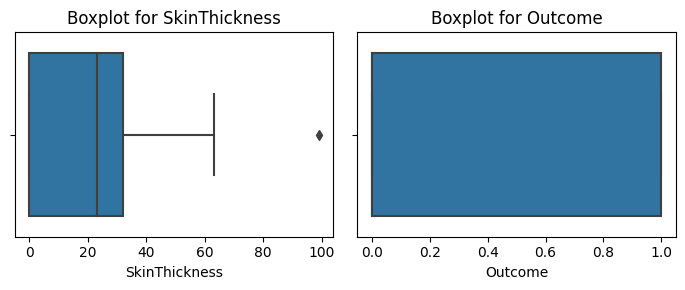

In [ ]:
n_rows, n_columns = 1, 2

fig, axes = plt.subplots(n_rows, n_columns, figsize=(7, 3))
axes = axes.flatten()

num = 0
for i, column in enumerate(df.columns):
    if column in ["SkinThickness", "Outcome"]:
        sns.boxplot(data=df, x=column, ax=axes[num])
        axes[num].set_title(f'Boxplot for {column}')
        num += 1

# Adjust layout
plt.tight_layout()
plt.show()

Les fonctionnalités telles que Grossesses, Glycémie, Pression artérielle, BMI, DiabetesPedigreeFunction et Age affichent des valeurs bien réparties. L’éventail de ces caractéristiques semble raisonnable, avec moins de valeurs aberrantes.

Pour les fonctionnalités SkinThickness et Insulin, la distribution est légèrement asymétrique, la plupart des valeurs étant nulles. Au moins pour SkinThickness, la médiane semble plus éloignée de zéro et la distribution semble saine. Par conséquent, si la corrélation entre SkinThickness et Outcome donne une bonne relation, SkinThickness peut toujours être utilisée.

L'insuline semble cependant être une information incomplète. Il serait donc peut-être judicieux de supprimer cette fonctionnalité.

## examine correlation plots
Un "correlation plot" (graphique de corrélation) est une représentation graphique qui affiche les relations de corrélation entre différentes variables. La corrélation mesure la force et la direction d'une relation linéaire entre deux variables. Un graphique de corrélation peut être utilisé pour visualiser ces relations de manière concise et informative.
### en utilise Matrice de corrélation :
Cela permet de visualiser rapidement les relations entre ces variables et d'identifier les associations potentielles, ce qui peut être utile pour comprendre le jeu de données et prendre des décisions basées sur ces relations.


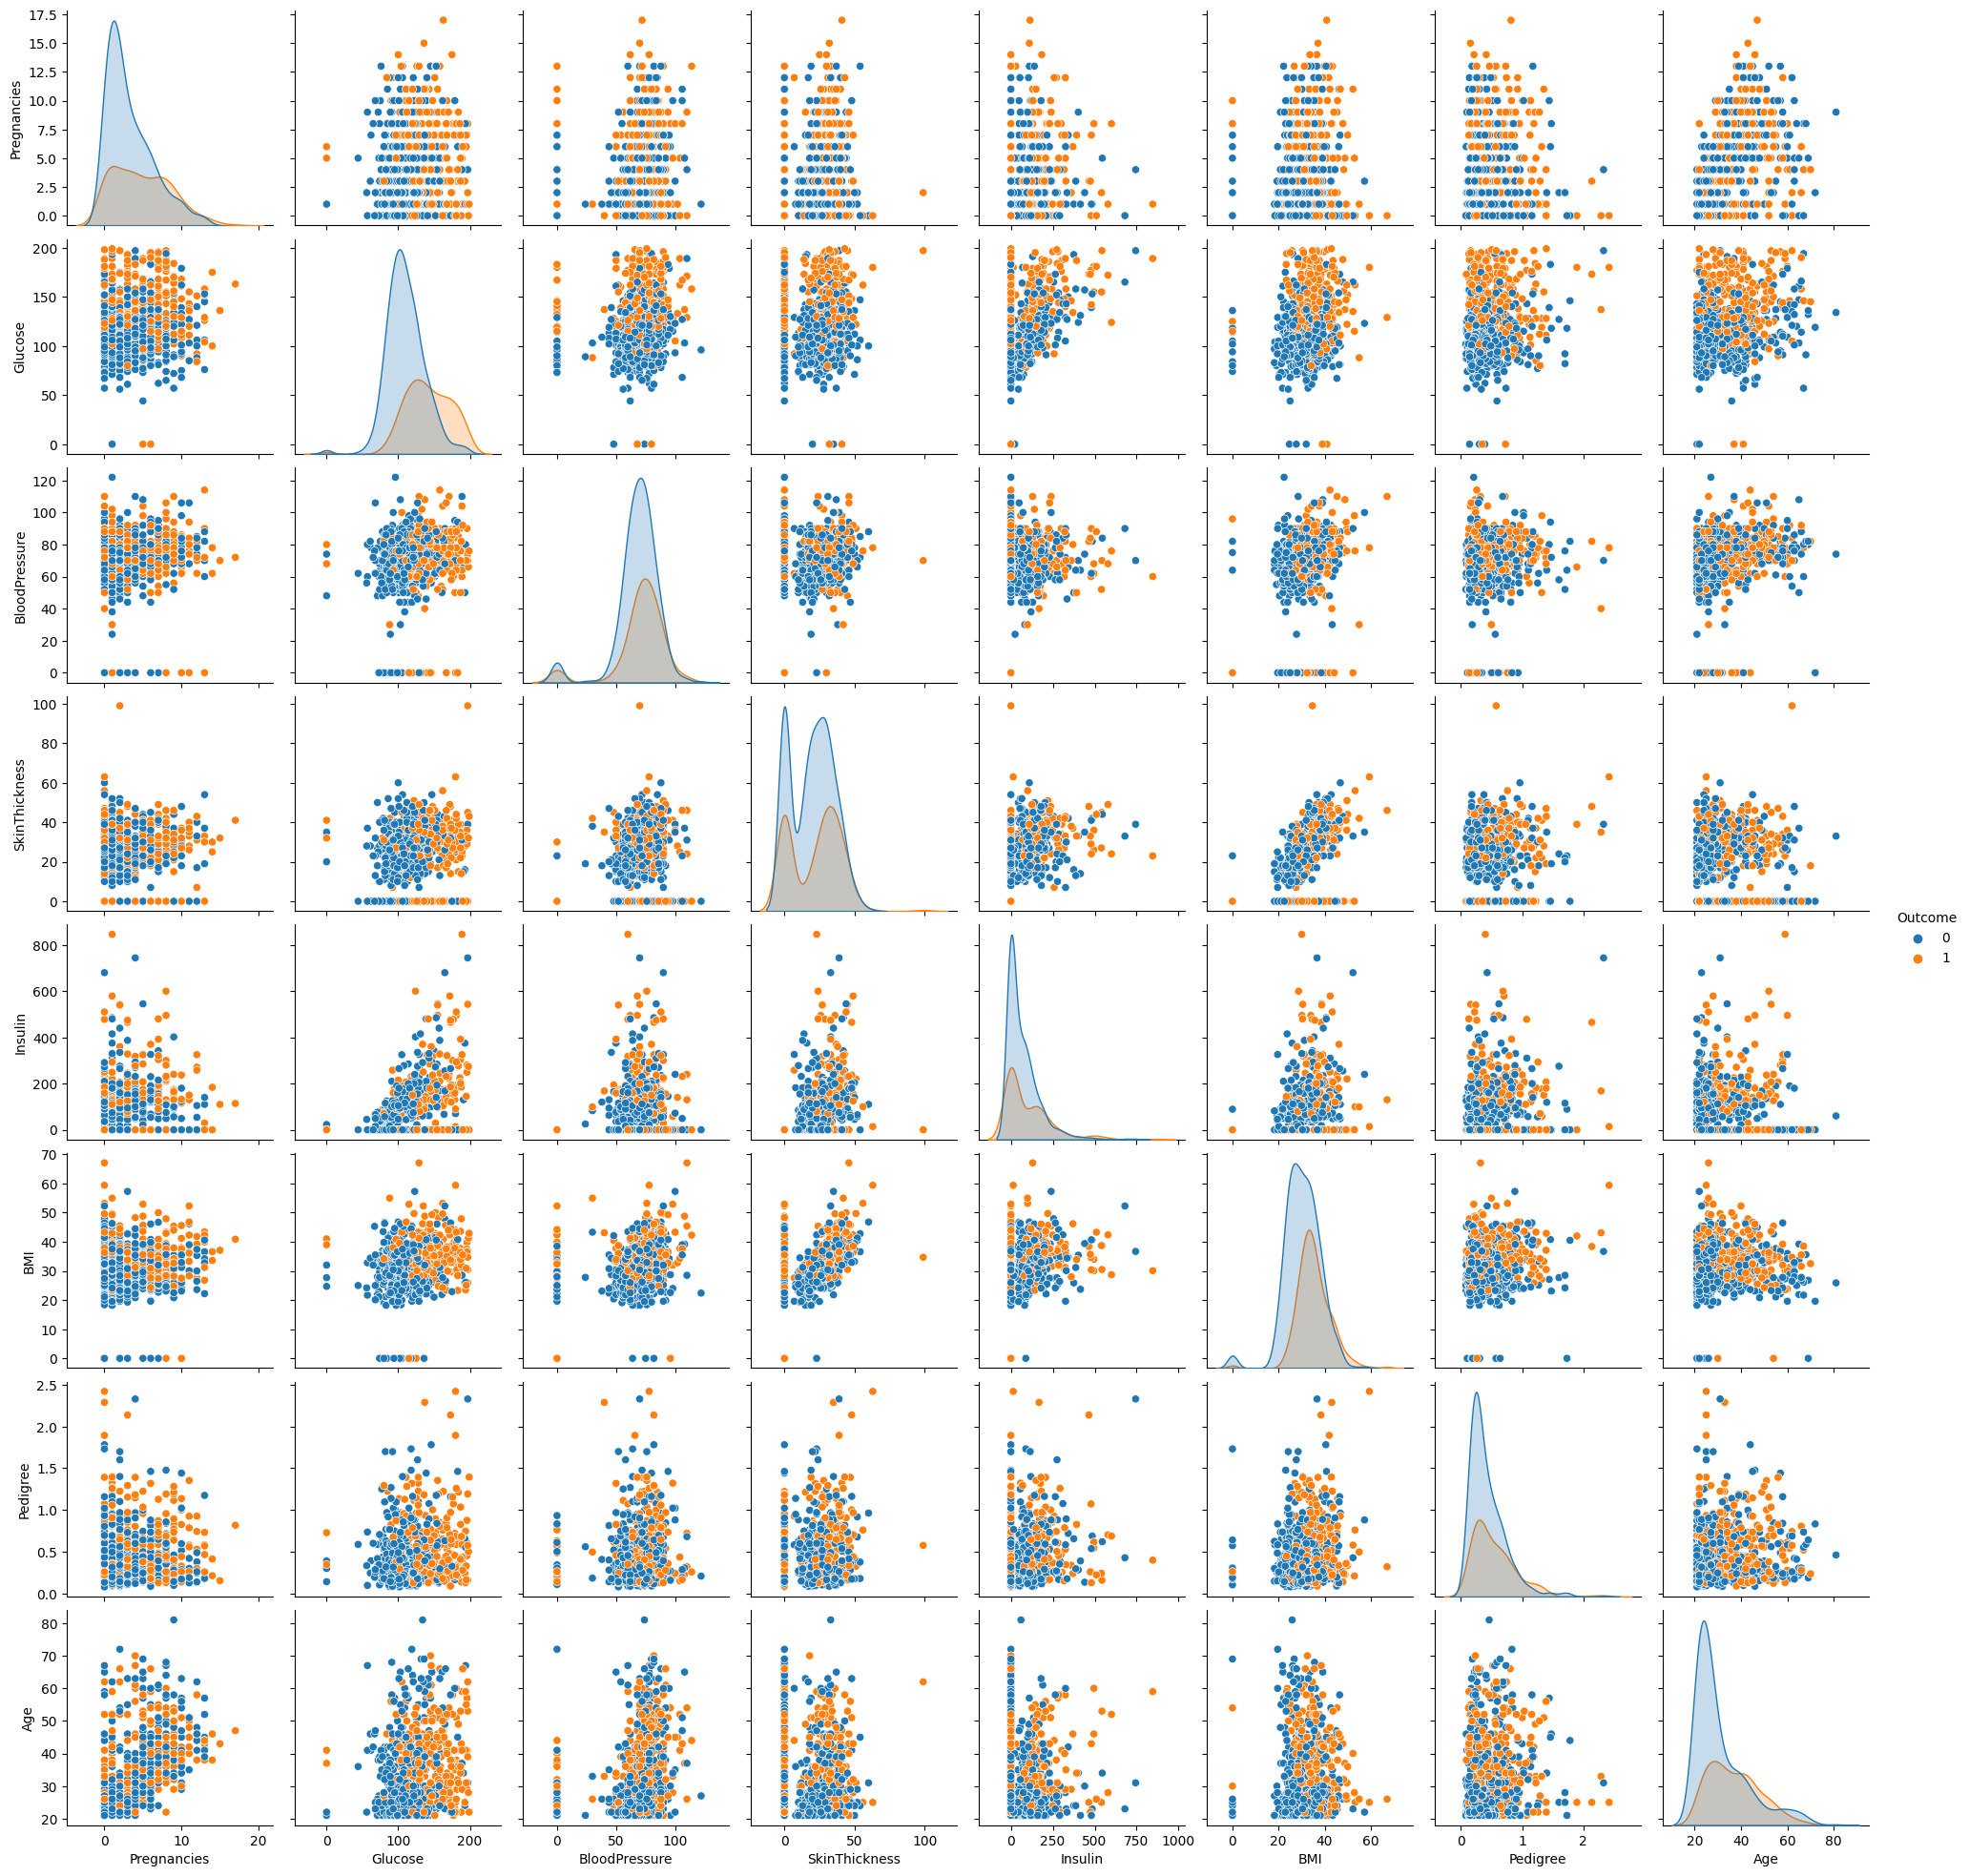

In [ ]:
sns.pairplot(data = df, hue = 'Outcome' )
plt.show()

lors de l'inspection primaire, il ne semble y avoir aucune caractéristique qui pourrait à elle seule influencer le résultat. Des caractéristiques telles que le glucose, l’BMI et l’âge semblent clairement influencer le résultat. Mais il n’existe aucun élément qui puisse à lui seul être concluant à cet égard.

De plus, des caractéristiques telles que SkinThickness + BMI ou Insuline + Glucose semblent fortement corrélées.

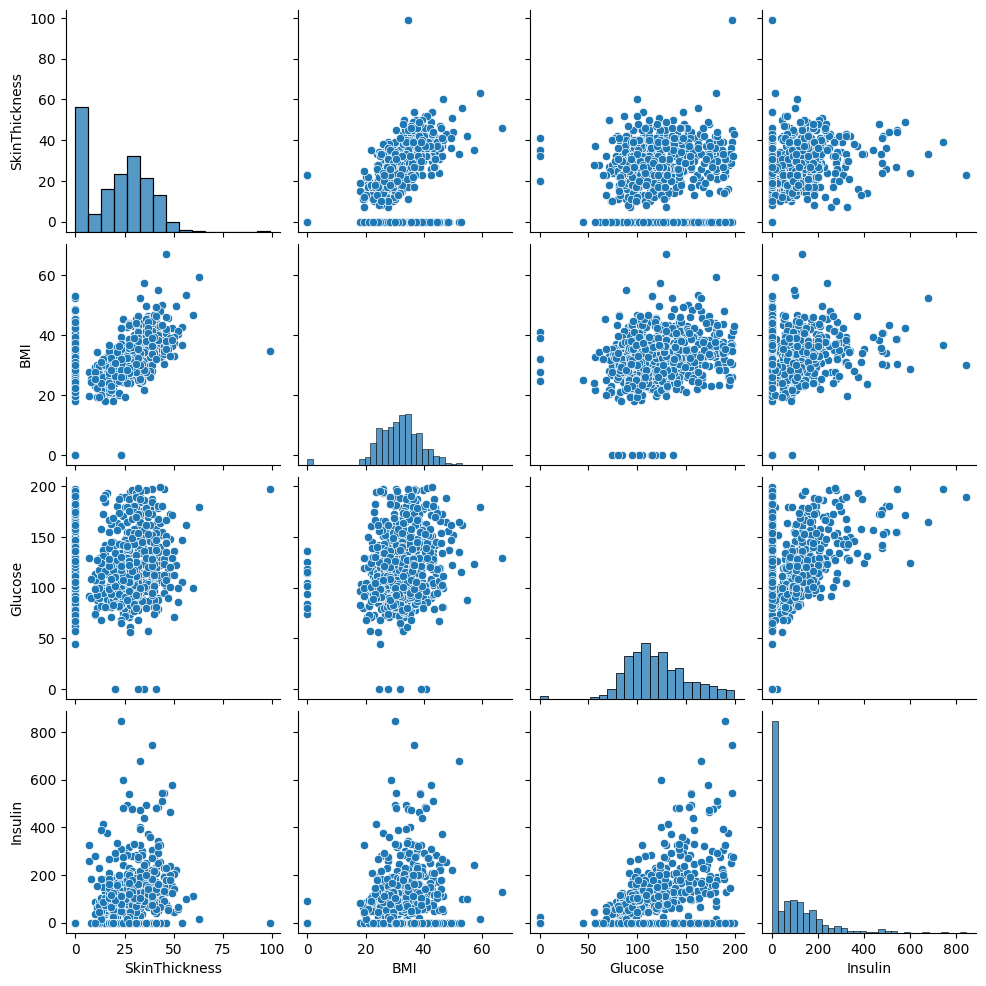

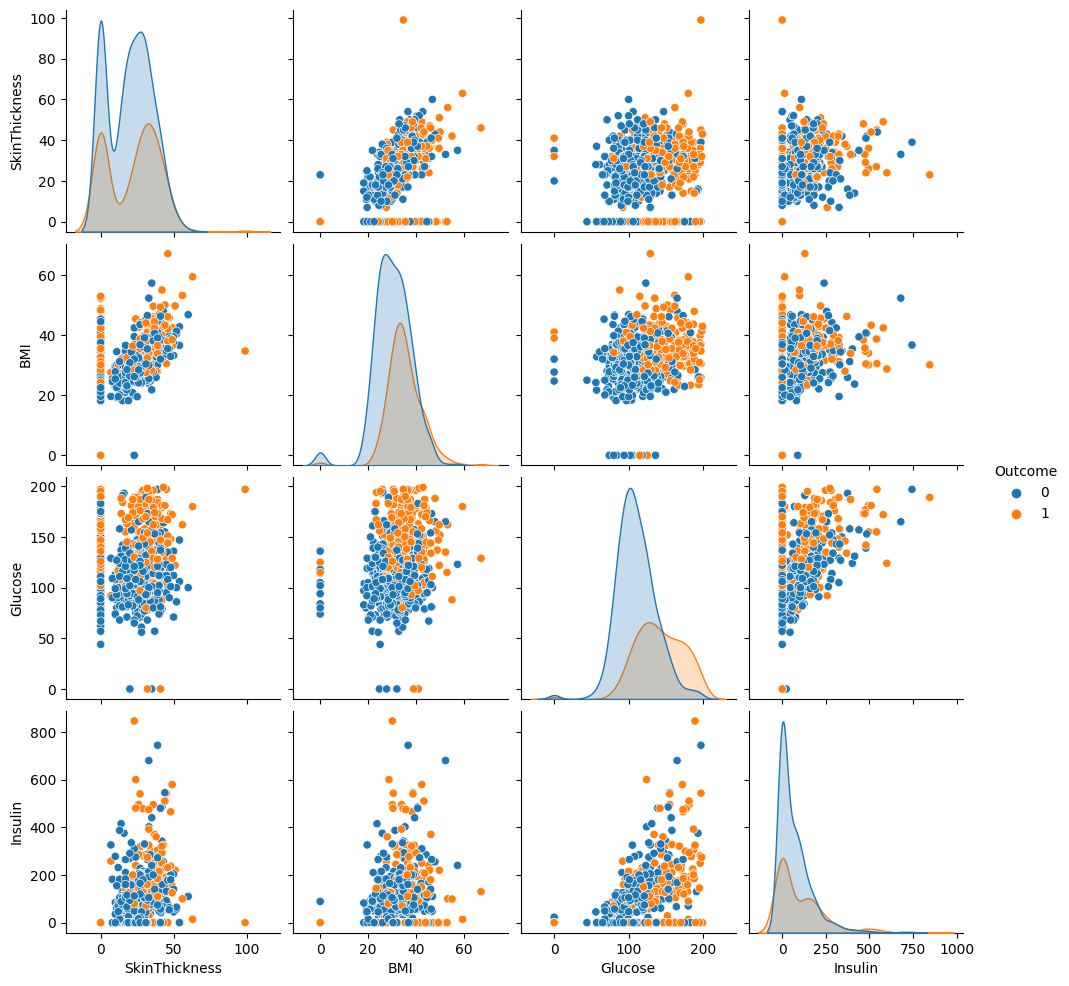

In [ ]:
sns.pairplot(data = df, vars = ['SkinThickness', 'BMI', 'Glucose', 'Insulin'])
plt.show()

sns.pairplot(data = df, vars = ['SkinThickness', 'BMI', 'Glucose', 'Insulin'], hue = 'Outcome')
plt.show()

Corrélation : La corrélation est un terme statistique qui, dans l'usage courant, fait référence à la proximité de deux variables par rapport à une relation linéaire l'une avec l'autre.

Les caractéristiques avec une corrélation élevée sont dépendantes de manière plus linéaire et ont donc presque le même effet sur la variable dépendante. Ainsi, lorsque deux fonctionnalités ont une forte corrélation, nous pouvons supprimer l’une des deux fonctionnalités.

In [ ]:
Outliers_columns = ['BloodPressure', 'Pedigree', 'BMI',"SkinThickness"]

for i in Outliers_columns:
    #Calculate the first and third quartiles
    q1 = np.percentile(df[i], 25, interpolation='midpoint')
    q3 = np.percentile(df[i], 75, interpolation='midpoint')
    print(i, q1, q3)

    # Find outliers in the specified column
    outliers_0 = (df[i] == 0)

    # Set value randomly from 50th percentile (from midpoint)
    df.loc[outliers_0, i] = np.random.uniform(q1, q3)


BloodPressure 62.0 80.0
Pedigree 0.2435 0.6265000000000001
BMI 27.3 36.6
SkinThickness 0.0 32.0


<ipython-input-13-d7b4301ea3fb>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(df[i], 25, interpolation='midpoint')
<ipython-input-13-d7b4301ea3fb>:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q3 = np.percentile(df[i], 75, interpolation='midpoint')


In [ ]:
for i in Outliers_columns:
    # Calculate IQR (Interquartile Range)
    iqr = q3 - q1

    # Define the upper and lower bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the closest within the bounds
    df[i] = np.where((df[i] < lower_bound) | (df[i] > upper_bound), np.random.uniform(q1, q3), df[i])

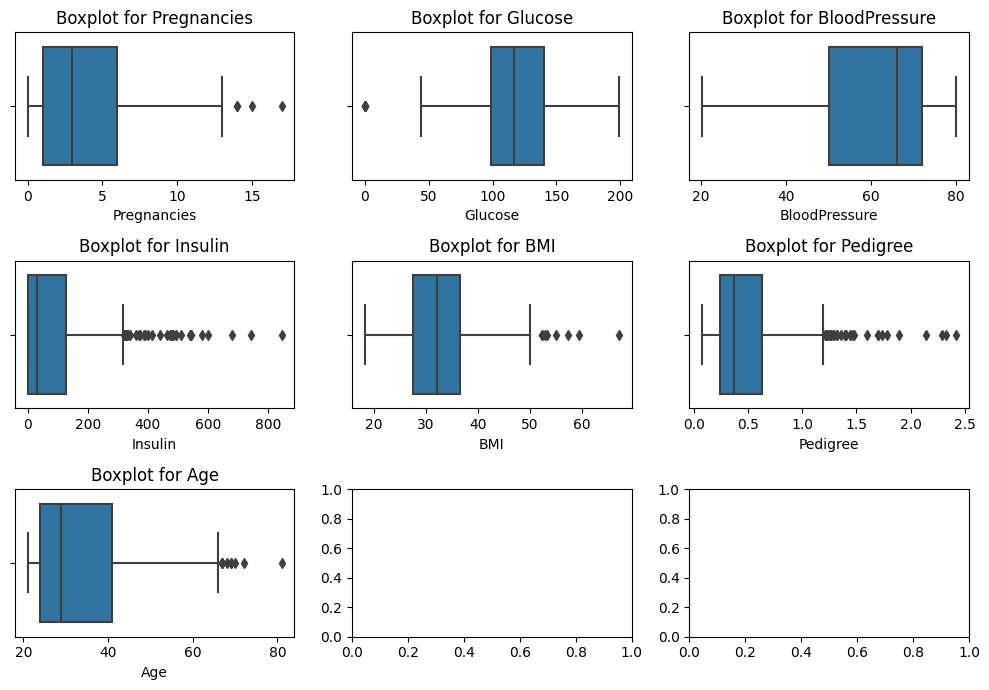

In [ ]:
n_rows, n_columns = 3, 3

fig, axes = plt.subplots(n_rows, n_columns, figsize=(10, 7))
axes = axes.flatten()

num = 0
for i, column in enumerate(df.columns):
    if column not in ["SkinThickness",  "Outcome"]:
        sns.boxplot(data=df, x=column, ax=axes[num])
        axes[num].set_title(f'Boxplot for {column}')
        num += 1

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

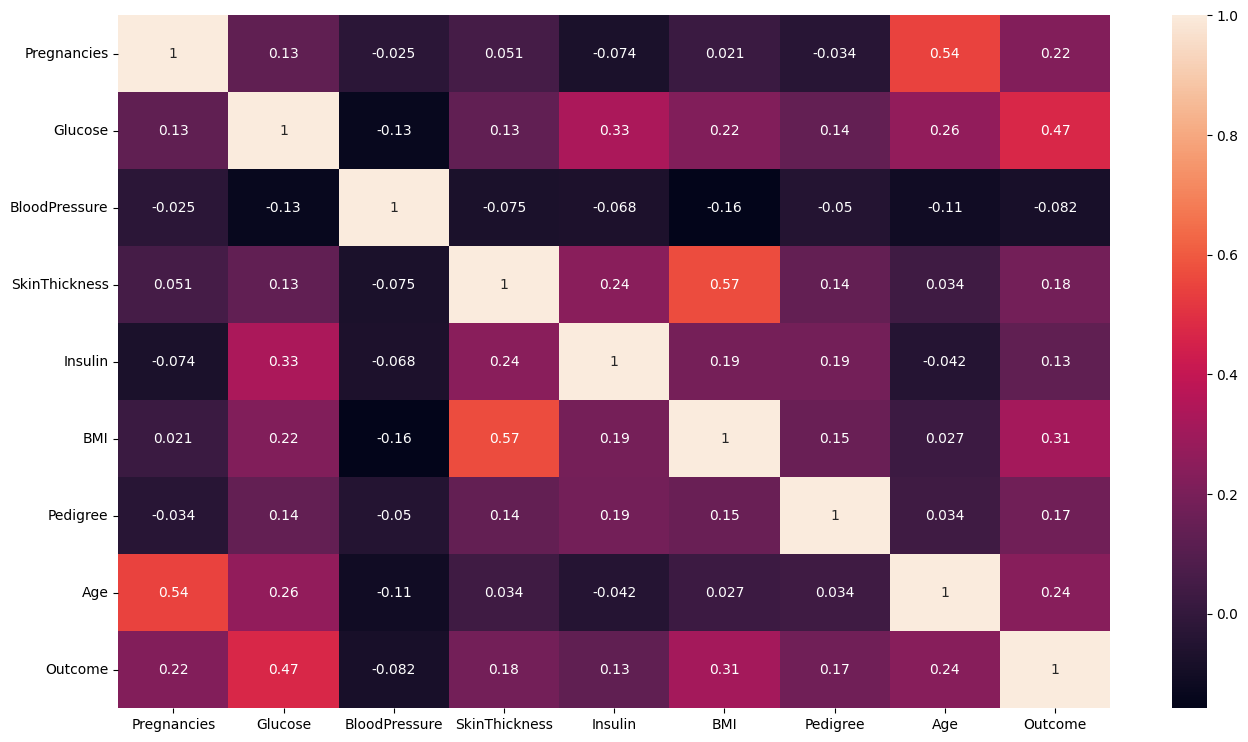

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True)

In [ ]:
hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Outcome"]) >= 0.2]
hig_corr_features

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

In [ ]:
columns= ["Pregnancies","Glucose","BloodPressure","BMI","Pedigree","Age"]
labels = df["Outcome"].values
features = df[list(columns)].values

**Train_Test_Split**

In [ ]:
from sklearn.model_selection import train_test_split

#Function responsable to dividing the DataSets takes four prameters the features, labels, test_size and random state
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)
#La graine aléatoire (random_state=42) assure la reproductibilité des résultats.


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#intializing the model, in this case we choose RandomForest
clf = RandomForestClassifier ( n_estimators=10 )

#train the model by passing the features and label
clf = clf.fit(X_train, y_train)

In [ ]:
rf_train_presicion = clf.score(X_train, y_train)
rf_train_presicion

0.984375

In [ ]:
rf_test_presicion = clf.score(X_test, y_test)
rf_test_presicion

0.7552083333333334

**Evaluate the model's performence by calculating the accuracy**

### Confusion matrix and classification report for the testing

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

yrf_train_pred = clf.predict(X_train)
print("trainning classification report :\n ", classification_report(y_train,yrf_train_pred))

trainning classification report :
                precision    recall  f1-score   support

           0       0.98      0.99      0.99       377
           1       0.99      0.96      0.98       199

    accuracy                           0.98       576
   macro avg       0.99      0.98      0.98       576
weighted avg       0.98      0.98      0.98       576



In [ ]:
print("Confusion matrix of traning :\n ", confusion_matrix(y_train, yrf_train_pred))

Confusion matrix of traning :
  [[375   2]
 [  7 192]]


In [ ]:
yrf_test_pred = clf.predict(X_test)
print("testing classification report :\n ", classification_report(y_test,yrf_test_pred))
print("Confusion matrix of testing :\n ", confusion_matrix(y_test,yrf_test_pred))

testing classification report :
                precision    recall  f1-score   support

           0       0.80      0.83      0.81       123
           1       0.67      0.62      0.65        69

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.76      0.75       192

Confusion matrix of testing :
  [[102  21]
 [ 26  43]]


# **improve model performance**

##Hyper-Parameter Tuned Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [10, 50,100], # Adjust the number of trees in the forest
    'max_depth' : [3, 7, 10], # how deep indiavidual tree can be
    'min_samples_leaf': [2, 5], # Adjust the minimum samples required in a leaf node
    'min_samples_split': [1, 3],   # Adjust the minimum samples required to split a node
}


model = RandomForestClassifier(random_state=42)
grid_search =  GridSearchCV(estimator=model, param_grid=param_grid, cv=4)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
print("Meilleurs paramètres Random Forest :", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Meilleurs paramètres Random Forest : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}


In [ ]:
rf_train_pred = best_model.predict(X_train)
accuracy_tr = accuracy_score(y_train, rf_train_pred)
print("Train Accuracy: ",accuracy_tr)

rf_test_pred = best_model.predict(X_test)
accuracy_ts = accuracy_score(y_test, rf_test_pred)
print("Test Accuracy: ",accuracy_ts)

ypred = clf.predict(X_test)
print("testing classification report :\n ", classification_report(y_test,rf_test_pred))
print("Confusion matrix of testing :\n ", confusion_matrix(y_test, rf_test_pred))

Train Accuracy:  0.9618055555555556
Test Accuracy:  0.7447916666666666
testing classification report :
                precision    recall  f1-score   support

           0       0.81      0.78      0.80       123
           1       0.64      0.68      0.66        69

    accuracy                           0.74       192
   macro avg       0.72      0.73      0.73       192
weighted avg       0.75      0.74      0.75       192

Confusion matrix of testing :
  [[96 27]
 [22 47]]


**Z_score Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **SVM**

In [ ]:
from sklearn.svm import SVC

svm_param_grid = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.01, 0.1, 1, 10],
                  'kernel': ['sigmoid','linear']}
svm_grid_search = GridSearchCV(SVC(),svm_param_grid, cv=4)
svm_grid_search.fit(X_train_scaled, y_train)
print("Meilleurs paramètres SVM :", svm_grid_search.best_params_)

Meilleurs paramètres SVM : {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}


In [ ]:
svm_train_presicion = svm_grid_search.score(X_train_scaled, y_train)
svm_train_presicion

0.7795138888888888

In [ ]:
svm_test_presicion = svm_grid_search.score(X_test_scaled, y_test)
svm_test_presicion

0.7395833333333334

In [ ]:
ysvm_train_pred = svm_grid_search.predict(X_train_scaled)
print("trainning classification report :\n ", classification_report(y_train,ysvm_train_pred))
print("Confusion matrix of traning :\n ", confusion_matrix(y_train, ysvm_train_pred))

trainning classification report :
                precision    recall  f1-score   support

           0       0.79      0.89      0.84       377
           1       0.74      0.56      0.64       199

    accuracy                           0.78       576
   macro avg       0.77      0.73      0.74       576
weighted avg       0.77      0.78      0.77       576

Confusion matrix of traning :
  [[337  40]
 [ 87 112]]


In [ ]:
ysvm_test_pred = svm_grid_search.predict(X_test_scaled)
print("testing classification report :\n ", classification_report(y_test,ysvm_test_pred))
print("Confusion matrix of testing :\n ", confusion_matrix(y_test, ysvm_test_pred))

testing classification report :
                precision    recall  f1-score   support

           0       0.79      0.81      0.80       123
           1       0.65      0.61      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192

Confusion matrix of testing :
  [[100  23]
 [ 27  42]]


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {'n_neighbors': [3, 5, 7, 10],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=4)
knn_grid_search.fit(X_train_scaled, y_train)
print("Meilleurs paramètres KNN :", knn_grid_search.best_params_)

Meilleurs paramètres KNN : {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}


In [ ]:
knn_train_presicion = knn_grid_search.score(X_train_scaled, y_train)
knn_train_presicion

0.7934027777777778

In [ ]:
knn_test_presicion = knn_grid_search.score(X_test_scaled, y_test)
knn_test_presicion

0.7135416666666666

In [ ]:
yknn_train_pred = knn_grid_search.predict(X_train_scaled)
print("trainning classification report :\n ", classification_report(y_train,yknn_train_pred))
print("Confusion matrix of traning :\n ", confusion_matrix(y_train, yknn_train_pred))

trainning classification report :
                precision    recall  f1-score   support

           0       0.80      0.92      0.85       377
           1       0.78      0.56      0.65       199

    accuracy                           0.79       576
   macro avg       0.79      0.74      0.75       576
weighted avg       0.79      0.79      0.78       576

Confusion matrix of traning :
  [[345  32]
 [ 87 112]]


In [ ]:
yknn_test_pred = knn_grid_search.predict(X_test_scaled)
print("testing classification report :\n ", classification_report(y_test,yknn_test_pred))
print("Confusion matrix of testing :\n ", confusion_matrix(y_test, yknn_test_pred))

testing classification report :
                precision    recall  f1-score   support

           0       0.76      0.81      0.78       123
           1       0.62      0.54      0.57        69

    accuracy                           0.71       192
   macro avg       0.69      0.67      0.68       192
weighted avg       0.71      0.71      0.71       192

Confusion matrix of testing :
  [[100  23]
 [ 32  37]]


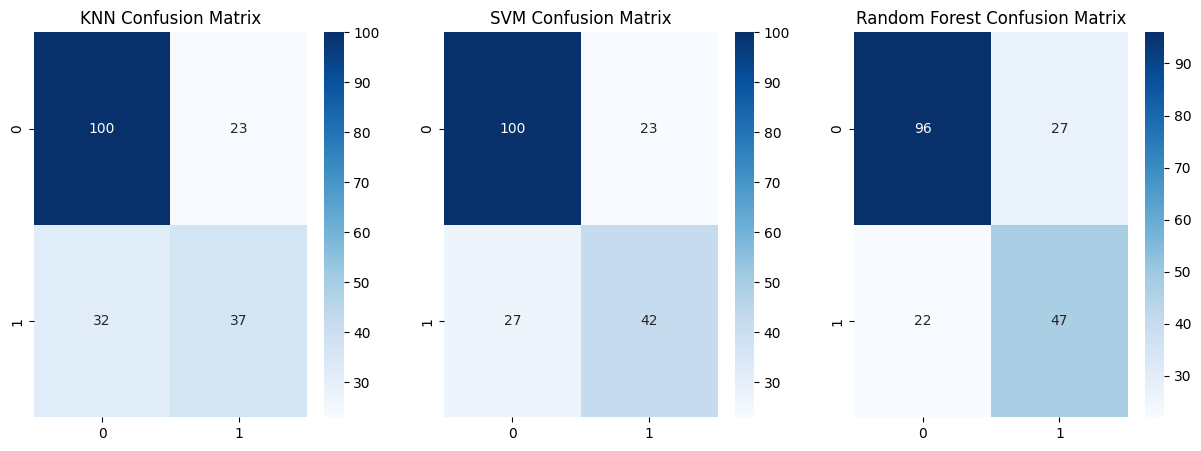

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

knn_conf_matrix= confusion_matrix(y_test, yknn_test_pred)
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("KNN Confusion Matrix")

svm_conf_matrix= confusion_matrix(y_test, ysvm_test_pred)
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")

rf_conf_matrix= confusion_matrix(y_test, rf_test_pred)
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Random Forest Confusion Matrix")

plt.show()

In [ ]:

summary_table = pd.DataFrame({
    'Modèle': ['KNN', 'SVM', 'Random Forest'],
    'Précision': [knn_test_presicion, svm_test_presicion, rf_test_presicion]
})
print(summary_table)

          Modèle  Précision
0            KNN   0.713542
1            SVM   0.739583
2  Random Forest   0.755208
